# Projeto 2 -  Udacity
## Programa Nanodegree Fundamentos de Data Science II

### Marlesson R. O. de Santana

# Análise de Sobreviventes do Titanic


O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. 

Uma das razões pelas quais o naufrágio levou a uma grande perda de vidas era que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta. Vamos analisar o quanto esses fatores propiciaram para a sobrevivência do passageiro.


In [26]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
import seaborn as sns
from pylab import rcParams
import warnings

### Seaborn style
sns.set_style("whitegrid")

### Params
#sns.mpl.rc("figure", figsize=(15,4))
#plt.rcParams['figure.figsize']=(10,10)

%matplotlib inline  
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['axes.titlesize'] = 30
warnings.filterwarnings(action='ignore')

In [27]:
def add_percentagem(g):
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in g.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(g.patches):    
        # Adding percentages   
        g.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14)     


In [28]:
### Let's import our data
df = pd.read_csv('titanic.csv',index_col='PassengerId')

### Transform
df['Survived?'] = df['Survived']
df['Survived'] = df['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
df['Sex']      = df['Sex'].map({'male': 'Homem', 'female': 'Mulher'})
df['Class']    = df['Pclass'].map({1: '1º Classe', 2: '2º Classe', 3: '3º Classe'})

## Filter
df = df[['Class', 'Pclass', 'Sex', 'Age', 'Survived', 'Survived?']]

### Independente de classe, sexo e idade, analisando apenas o total de ocorrências, é possível observar que mais pessoas **não** sobreviveram ao acidente.

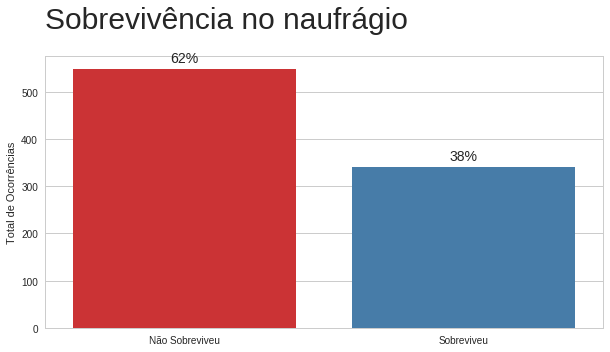

In [29]:
g = sns.countplot(df.Survived, palette='Set1');
add_percentagem(g)
plt.xlabel('');
plt.ylabel('Total de Ocorrências');
plt.title('Sobrevivência no naufrágio', loc='left', y=1.08)
plt.show()

É possível observar que a maioria das pessoas **não sobreviveram** ao desastre. De um total de 891 pessoas, cerca de **62%** não sobreviveram.

## Se agruparmos as ocorrências por sexo, fica evidente que preferência no resgate foram das mulheres

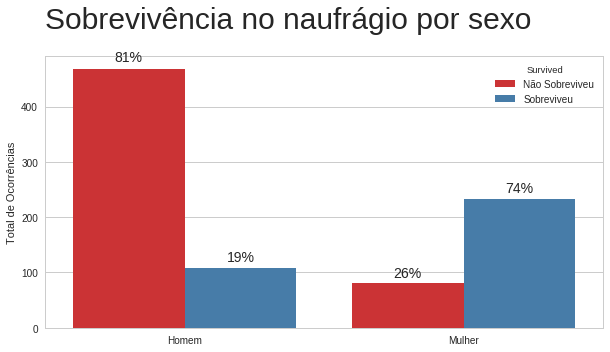

In [30]:
g = sns.countplot(x="Sex", hue="Survived", data=df, palette='Set1')
add_percentagem(g)
plt.xlabel('');
plt.ylabel('Total de Ocorrências');
plt.title('Sobrevivência no naufrágio por sexo', loc='left', y=1.08)
plt.show()

É evidente que houve preferência no resgate das mulheres, sendo que **71%** das mulheres sobreviveram ao desastre do Titanic (dados oficiais). 

### Utilizando a distribuição de sobrevivêntes por idade, é possível observar que as crianças tiveram preferência no resgate, e que o maior indice de fatalidade ocorreu entre pessoas de 20 a 30 anos

Observando a distribuição das idades de todos os passageiros abaixo, temos que a média de idade dos passageiros é de *30 anos*, sendo que, a maioria dos passageiros tem idade entre 20 a 40 anos

In [54]:
# Distribuição das idades dos passageiros
fig = ff.create_distplot([list(df.Age.dropna())], ['Idade'], bin_size=2)
fig['layout'].update(title='Distribuição das idades dos passageiros')
py.iplot(fig)

Com relação a sobrevivênia por idade, é possível observar **alguns pontos** importantes entre as pessoas que **não** sobreviveram e as que sobreviveram.
* Houve um maior indice de sobreviventes para as crianças de até 5 anos de idade
* Entre as pessoas entre 15 e 30 anos, o indice de **não sobrevivência** foi maior
* A partir de 30 anos a distribuição permanece semelhante.

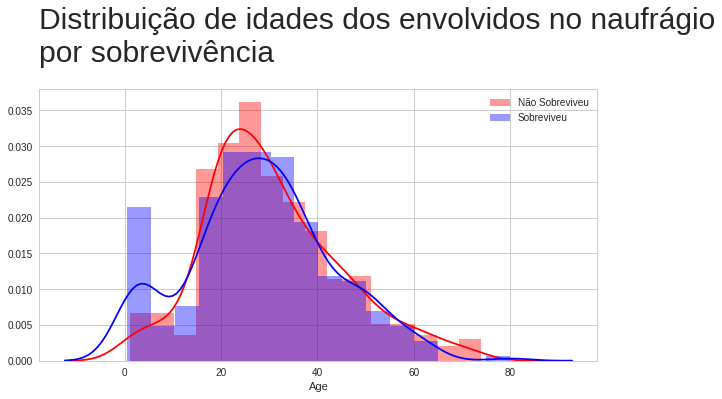

In [33]:
### Distribution per Survived / Not Survived Value
sns.distplot(df.loc[df.Survived=='Não Sobreviveu', 'Age'].dropna(), color='red', label='Não Sobreviveu');
sns.distplot(df.loc[df.Survived=='Sobreviveu', 'Age'].dropna(), color='blue', label='Sobreviveu');
plt.legend(loc='best')
plt.title('Distribuição de idades dos envolvidos no naufrágio\npor sobrevivência', loc='left', y=1.08)
plt.show()

Embora **não** exista nenhuma regra naval relacionada a preferência no resgate de mulheres e crianças, observamos que para o naufrágio do Titanic houve de fato essa preferência. 

Embora, segundo [1],  na prática isso de fato não acontece. Um estudo de 2012 levantou dados sobre 16 naufrágios entre 1852 e 2011, envolvendo cerca de 150 mil pessoas (o Titanic foi deliberadamente excluído). Ele apontou que, do total de vítimas, 37,4% dos homens escaparam, mas apenas 26,7% das mulheres e 15,3% das crianças

[1] https://mundoestranho.abril.com.br/ambiente/em-naufragios-criancas-e-mulheres-tem-mesmo-prioridade/


### Um outro fator que poderia ter sido decisivo na sobrevivência é a classe social da pessoa. Será que o valor do Ticket de embarque propiciou a sobrevivência? 

O tickets de embarque foram vendidos para três classes direferentes, 1º classe, a mais cara e destinada apenas aos ricos e pessoas importantes, 2º classe e a 3º classe.

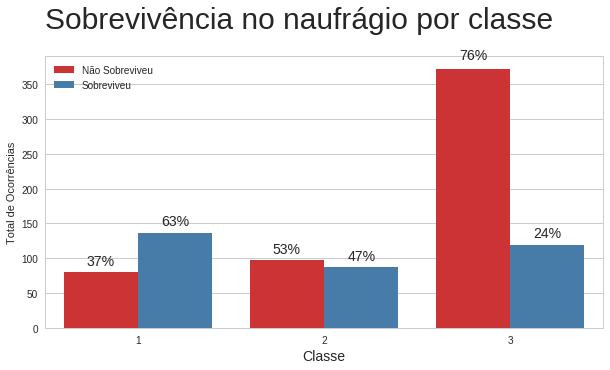

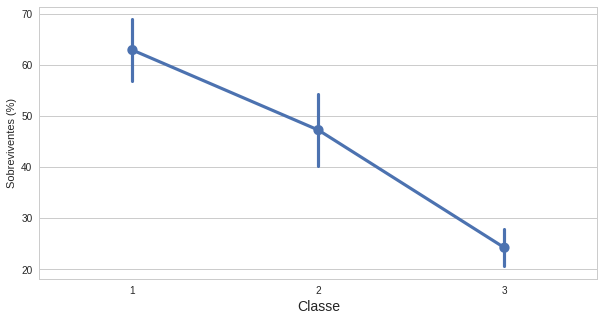

In [8]:
# Plot Bar
g = sns.countplot(x='Pclass', hue="Survived", data=df, palette='Set1');
add_percentagem(g)
plt.title('Sobrevivência no naufrágio por classe', loc='left', y=1.08)
plt.xlabel('Classe', fontsize=14);
plt.ylabel('Total de Ocorrências');
plt.legend(loc=0);
plt.show()

# Plot pount
_df = df
_df['Survived?'] = _df['Survived?']*100
sns.pointplot(x='Pclass', y='Survived?', data=df);
plt.xlabel('Classe', fontsize=14);
plt.ylabel('Sobreviventes (%)');

É possível observar que **a classe social influênciou bastante na sobrevivência**. Para a 1º classe, em que o valor do ticket é maior, houveram mais registros de sobrevivênia do que de fatalidades. Por outro lado, na 3º classe, a taxa de **não sobrevivência** é 2 vezes maior que a de sobrevivência.

É possível concluir que o valor do Ticket de embarque teve grande influência nas chances de sobrevivência do desastre

#### Com relação as chances de sobrevivência, se observarmos o gênero e a classe social é possível concluir que, independênte da classe, ser mulher é um fator decisivo para a sobrevivência

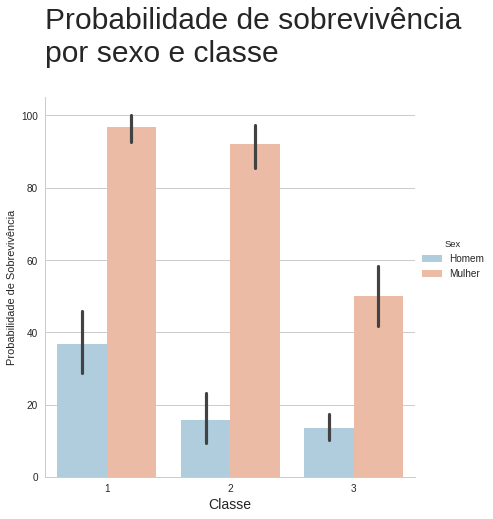

In [9]:
# Draw a nested barplot to show survival for class and sex
#sns.palplot(sns.color_palette("RdBu", n_colors=2))
g = sns.factorplot(x="Pclass", y="Survived?", hue="Sex", data=df,
                   size=6, kind="bar", palette="RdBu_r")
#g.despine(left=True)
plt.title('Probabilidade de sobrevivência\npor sexo e classe', loc='left', y=1.08)
plt.xlabel('Classe', fontsize=14);
g.set_ylabels("Probabilidade de Sobrevivência")

A **probabilidade de sobrevivência decresce com relação a classe**, tanto para homens quanto para mulheres. Mas, ser mulher ainda garante uma vantagem na sobrevivênia do desastre com o Titanic. **Mesmo uma mulher na 3º classe tem mais chances de sobrevivência que um homem na 1º classe.**

### Os três fatores analisados (sexo, classe social e idade) apresentaram correlação com a sobrevivência do indivíduo no desastre, dentre os três, o sexo é o mais predominante, seguido da classe social e por último a idade

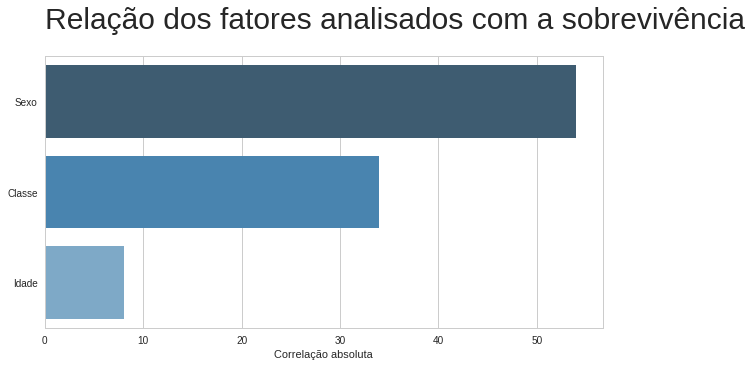

In [10]:
df['Sex2'] = df['Sex'].map({'Homem': 0, 'Mulher': 1})
cor_matrix = df[['Pclass', 'Sex2', 'Age', 'Survived?']].corr().round(2)
values     = cor_matrix['Survived?']
data       = {}
lbl        = {'Pclass': 'Classe', 'Sex2': 'Sexo', 'Age': 'Idade'}

for x in ['Sex2', 'Pclass', 'Age']:
    data[lbl[x]] = abs(values[x])*100
        
g = sns.barplot(y=list(data.keys()), x=list(data.values()), palette="Blues_d")
plt.title('Relação dos fatores analisados com a sobrevivência', loc='left', y=1.08)
g.set_xlabel("Correlação absoluta")
plt.show()

Nesse contexto, ser uma mulher de classe alta e com pouca idade eleva a quase 100% as chances de ter sobrevivido ao naufrágio do Titanic.

### Conclusão

Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, foi possível analisar que alguns grupos de pessoas eram mais propensos a sobreviver do que outros. **A classe social, gênero e idade foram fatores decisivos para a sobrevivência do indivíduo**.

Mulheres e crianças tiveram prioridade no resgate, apresentando maiores taxas de sobrevivência. Com relação a classe social, os Tickets de primeira classe garantiram maior probabilidade na sobrevivência do indivíduo em relação as classes mais pobres.
